# Nature Conservancy Fisheries Kaggle Competition
## Backdoor for manual additions to the fovea_dictionary for FishFinder training
This script can be used prior to, or during training of FishFinder NN, in order to manually annotate randomly generated fovea.
#### Dependencies

In [1]:
import numpy as np
import pandas as pd
import pickle
from scipy import misc
import os
import fish_data as fd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
version_ID = 'v1.1'

wd = os.getcwd()
verdir = wd+'/FishFinder_v2/'+version_ID
if not os.path.exists(verdir) :
    os.makedirs(verdir)

In [3]:
fov_size = 128
from_empty = False

#### Load dictionaries
Generated in `FishFinder_SETUP.ipynb`

In [4]:
if from_empty == True :

    with open('image_dictionary.pickle', 'rb') as handle : 
        image_dictionary = pickle.load(handle)

    with open('fovea_dictionary.pickle', 'rb') as handle : 
        fovea_dictionary = pickle.load(handle)
        
    with open('validation_dictionary.pickle', 'rb') as handle :
        validation_dictionary = pickle.load(handle)

elif from_empty == False :
    with open('image_dictionary.pickle', 'rb') as handle : 
        image_dictionary = pickle.load(handle)

    with open(verdir+'/fovea_dictionary.pickle', 'rb') as handle : 
        fovea_dictionary = pickle.load(handle)
        
    with open('validation_dictionary.pickle', 'rb') as handle :
        validation_dictionary = pickle.load(handle)
    
    #with open(verdir+'/validation_dictionary.pickle', 'rb') as handle :
    #    validation_dictionary = pickle.load(handle)

    
    
print("Fovea Training Set")
fish_counts = []
for fish_class in fovea_dictionary :
    fish_counts.append((fish_class, len(fovea_dictionary.get(fish_class))))
    print("{} : {} images".format(fish_counts[-1][0], fish_counts[-1][1]))

#print("\nValidation Training Set")
#fish_counts = []
#for fish_class in validation_dictionary :
#    fish_counts.append((fish_class, len(validation_dictionary.get(fish_class))))
#    print("{} : {} images".format(fish_counts[-1][0], fish_counts[-1][1]))


Fovea Training Set
DOL : 210 images
LAG : 271 images
NoF : 14414 images
SHARK : 228 images
YFT : 209 images
BET : 203 images
ALB : 203 images
OTHER : 203 images


## Annotate Fovea and stage

In [5]:
fish_counts[np.argmin( [x[1] for x in fish_counts]  )][0]

'BET'

In [6]:
next_class = fish_counts[np.argmin( [x[1] for x in fish_counts]  )][0]

f_list = []
for f in image_dictionary.get('train') :
    if f.find(next_class) != -1 :
        f_list.append(f)

In [7]:
key = np.random.choice(f_list)
print(key)

data/train/BET/img_04670.jpg


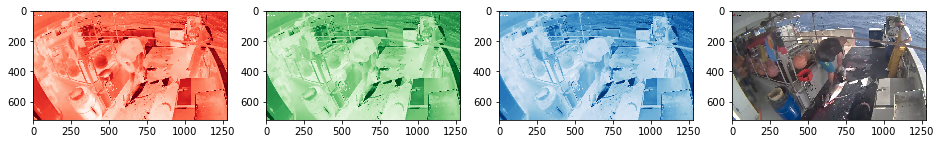

In [8]:
img_working = misc.imread(key, mode = 'RGB')
fd.show_panel(img_working)

### Write annote function

Label: BET
Scale: 1.5


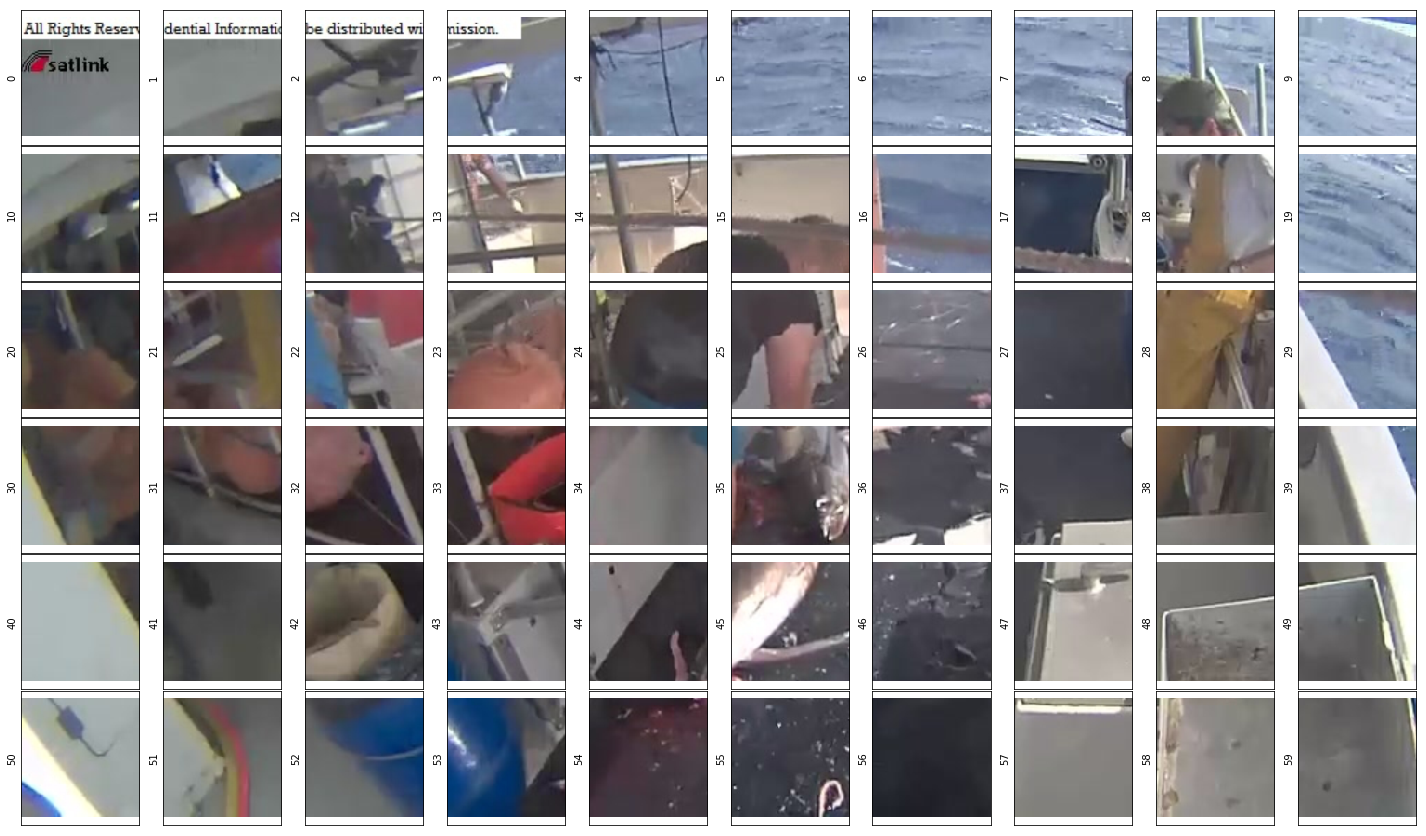

Stage to fish    45,35
Scale: 1.25


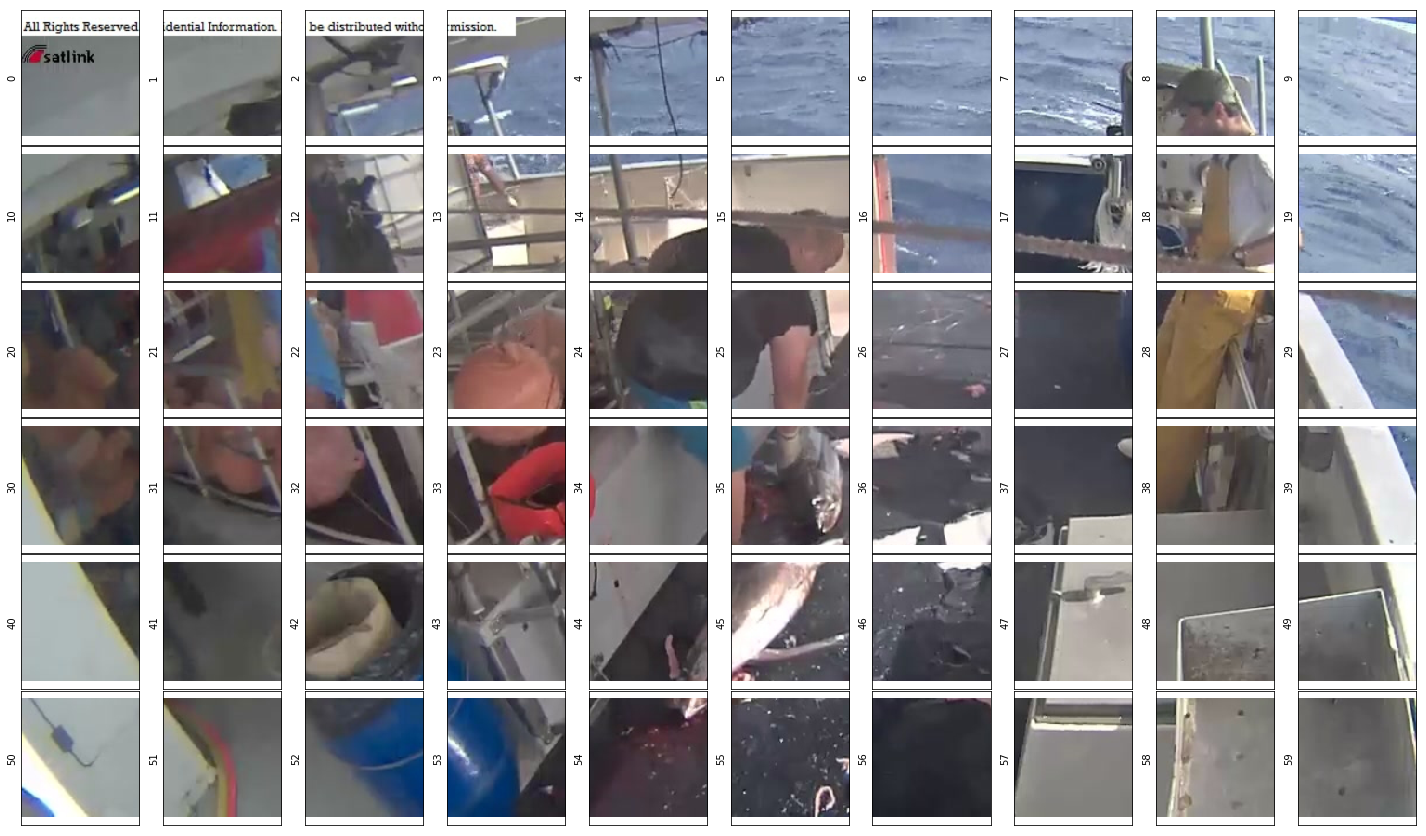

Stage to fish    44,45,35
Scale: 1.0


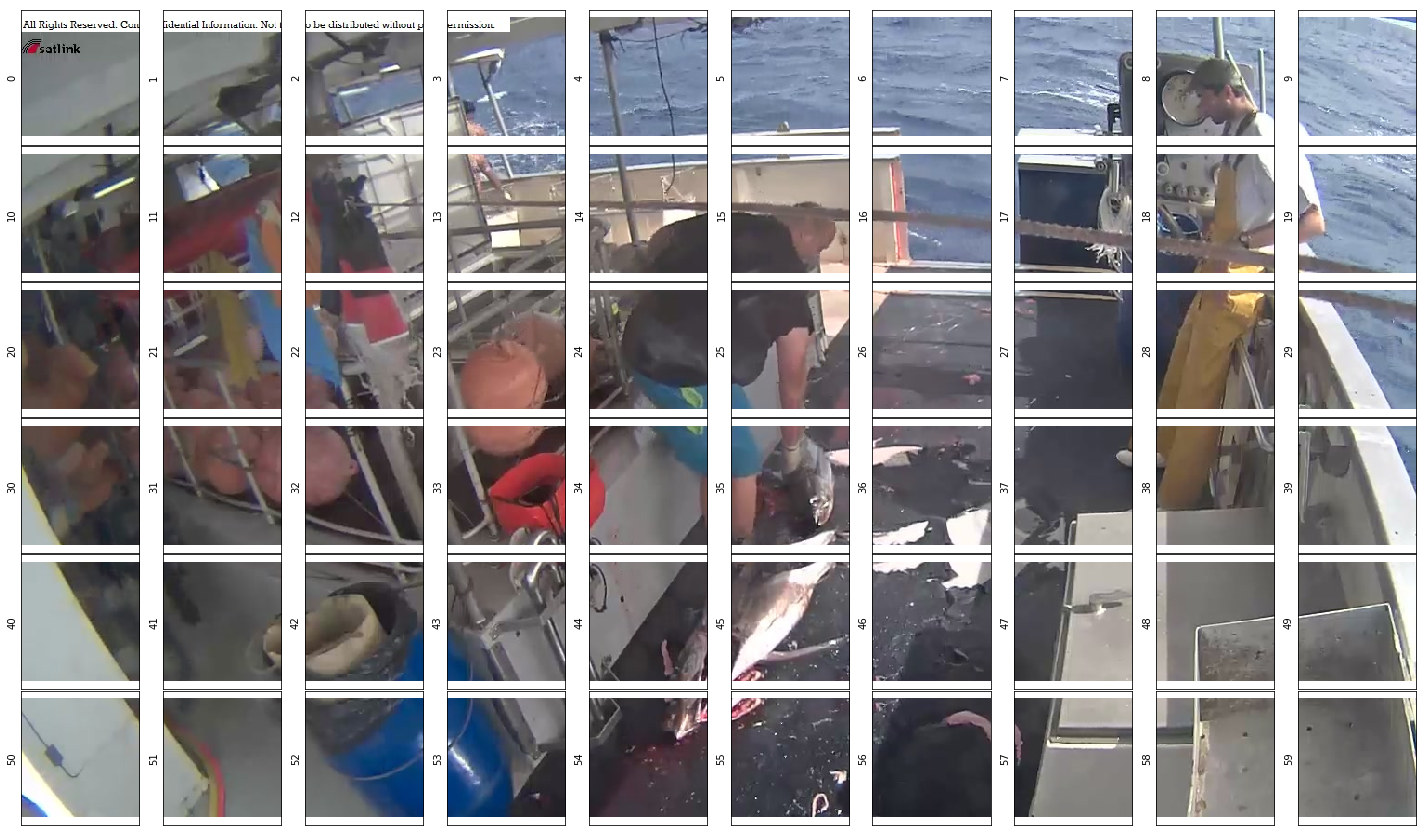

Stage to fish    54,44,45,35
Scale: 0.75


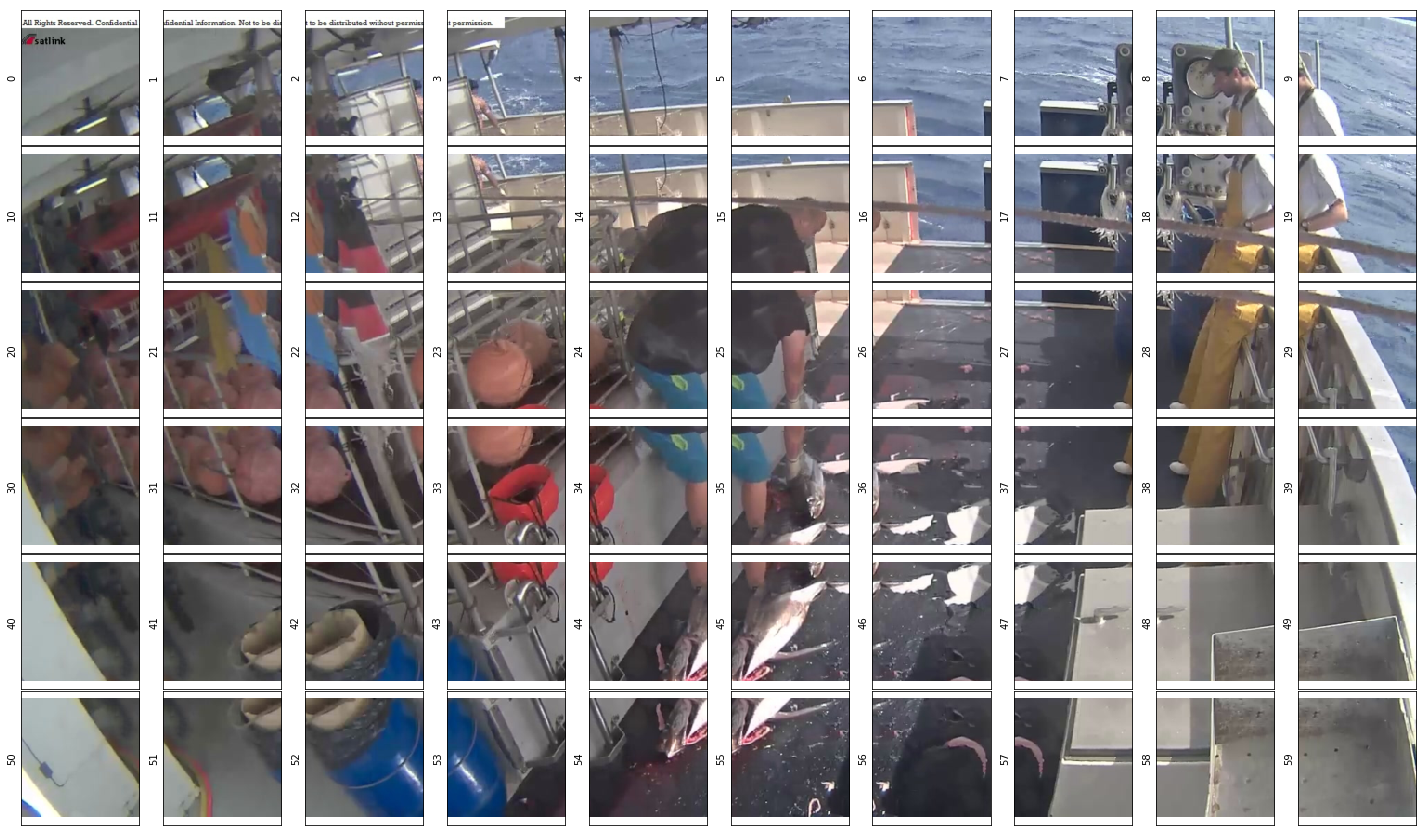

Stage to fish    35,44,45,54,55
Scale: 0.5


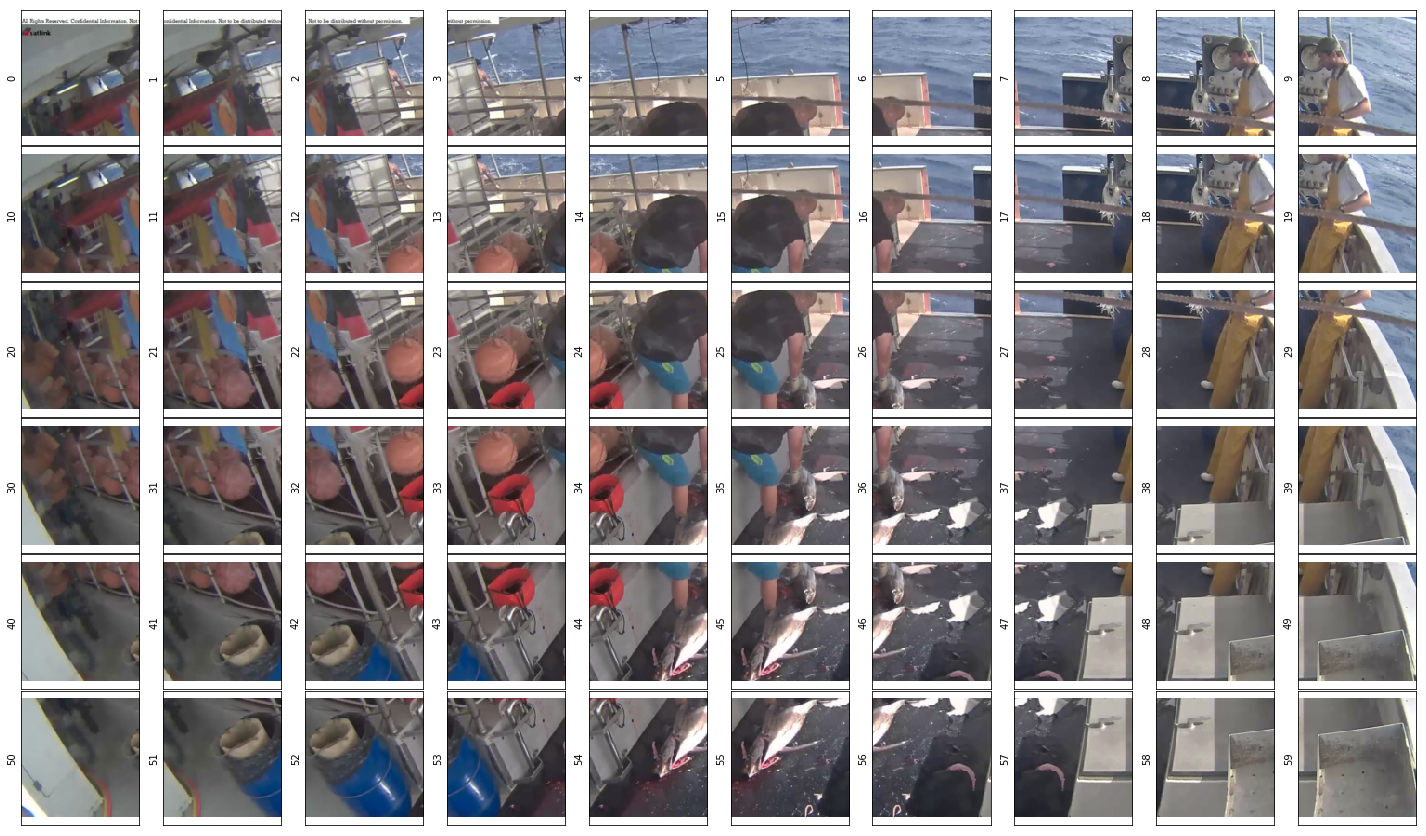

Stage to fish    25,26,34,35,36,44,45,46,54,55,56
commit to version directory master fovea or validation dictionary?  (y/n/v)     y
Updated Fovea Training Set
DOL : 210 images
LAG : 271 images
NoF : 14689 images
SHARK : 228 images
YFT : 209 images
BET : 228 images
ALB : 203 images
OTHER : 203 images


In [9]:
fd.annote_fovea_manager(key, image_dictionary = image_dictionary, fovea_dictionary = fovea_dictionary, 
                        validation_dictionary = validation_dictionary,
                            fov_size = fov_size, scale = [1.5, 1.25, 1.0, 0.75, 0.5], 
                            y_bins = 6, x_bins = 10, pixel_norm = None, verdir = verdir) 

#### 